# 1.School bussing problem, revisited

In [29]:
from gurobipy import *

In [30]:
m = Model()

## Question (b)

### Step 1: Create Matrix:

In [3]:
#list of area
I = list(range(1,7)) 
#list of school
J = list(range(1,4))
#list of grade proportion
K = list(range(1,4))
# cost_ij is the cost matrix,which represent the cost of bussing of student i to school j
# note:the cost of "999999999999999999" is used due to the infeasibility of the bussing assignment so that the optimization model will not pick. 
cost = [[300, 0, 700],
           [999999999999999999, 400, 500],
           [600, 300, 200],
           [200, 500, 999999999999999999],
           [0, 999999999999999999, 400],
           [500, 300, 0]]
# proportion_ik is the proportion matrix,which represent the percentage of students in grade k in area i
proportion_ik = [[0.32, 0.38, 0.30],
                 [0.37, 0.28, 0.35],
                 [0.30, 0.32, 0.38],
                 [0.28, 0.40, 0.32],
                 [0.39, 0.34, 0.27],
                 [0.34, 0.28, 0.38]]
#proportion_maximum_ik is obtained by sustracting 0.36 from each element in proportion_ik
proportion_maximum_ik = [[-0.04, 0.02, -0.06],
                 [0.01, -0.08, -0.01],
                 [-0.06, -0.04, 0.02],
                 [-0.08, 0.04, -0.04],
                 [0.03, -0.02, -0.09],
                 [-0.02, -0.08, 0.02]]
#proportion_minimum_ik is obtained by sustracting 0.30 from each element in proportion_ik
proportion_minimum_ik=[[0.02, 0.08, 0],
                 [0.07, -0.02, 0.05],
                 [0.00, 0.02, 0.08],
                 [-0.02, 0.10, 0.02],
                 [0.09, 0.04, -0.03],
                 [0.04, -0.02, 0.08]]
#capacity_j is a vector to capture the full capacity of 3 schools
capacity_j = [900,1100,1000]
#capacity_j is a vector to capture the total number of students in each area
student_i =[450,600,550,350,500,450]
# to determine whether a bussing is needed
need = [[1, 0, 1],
           [1, 1, 1],
           [1, 1, 1],
           [1, 1, 1],
           [0, 1, 1],
           [1, 1, 0]]

### Step 2:  Define the Decision Variables Matrix:

In [4]:
#Define the variables for decision matrix and set the variables to be integer
x = m.addVars(I, J, vtype=GRB.INTEGER,name="x") # number of students assigned from area i to school j
b = m.addVars(I, J, vtype=GRB.INTEGER,name="b") # number of buses needed to assign stuents from area i to school j

### Step 3:  Define the objective function:

In [5]:
#Set the objective function
m.setObjective(sum(x[i, j] * cost[i-1][j-1]
                   for i in I for j in J)+sum(40000*b[i,j] for i in I for j in J),
                   GRB.MINIMIZE)

### Step 4:  Add the Constraints:

### (1)Each assignment should be 0 or positive value:

In [6]:
m.addConstrs(x[i,j] >= 0 for i in I for j in J)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 3): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

### (2)Each school does not accommodate more than its full capacity:

In [7]:
#Add constraint:Each school does not accommodate more than its full capacity:
m.addConstrs(sum(x[i,j] for i in I) <= capacity_j[j-1] for j in J)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

### (3)All students in each area must be assign to a school:

In [8]:
#Add constraint:All students in each area must be assign to a school
student_i =[450,600,550,350,500,450]
m.addConstrs(sum(x[i,j] for j in J) == student_i[i-1] for i in I)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>}

### (4)Add constraint:Each grade must constitute less than or equal to 36 percent of each school’s population

In [15]:
#Add constraint:Each grade must constitute less than or equal to 36 percent of each school’s population
for j in J:
    for k in K:
        m.addConstr(sum(x[i,j] * proportion_maximum_ik[i-1][k-1] for i in I)<=0)

### (5)Add constraint:Each grade must constitute more than or equal to 30 percent of each school’s population

In [16]:
#Add constraint:Each grade must constitute more than or equal to 30 percent of each school’s population
for j in J:
    for k in K:
        m.addConstr(sum(x[i,j] * proportion_minimum_ik[i-1][k-1] for i in I)>=0)

### (6)Add constraint:Bus capacity constraints

In [17]:
m.addConstrs(60*b[i ,j] >= x[i, j]*need[i-1][j-1] for i in I for j in J)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 3): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

In [18]:
m.addConstrs(60*(b[i ,j] - 1) <= x[i, j]*need[i-1][j-1]-1 for i in I for j in J)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 3): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

In [19]:
m.addConstrs(b[i,j] == 0 for i in I for j in J if cost[i-1][j-1] == 0)

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

### Now the Optimization setup is complete, and we can tell Gurobi to solve the problem.  It will return the optimal objective function value at the end:

In [20]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 150 rows, 36 columns and 438 nonzeros
Model fingerprint: 0x63a53c69
Variable types: 0 continuous, 36 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-02, 6e+01]
  Objective range  [2e+02, 1e+18]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 1e+03]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint R109 by 14.400000000

Found heuristic solution: objective 3.450000e+20
Presolve removed 93 rows and 3 columns
Presolve time: 0.00s
Presolved: 57 rows, 33 columns, 198 nonzeros
Variable types: 0 continuous, 33 integer (0 binary)

Root relaxation: objective 1.665272e+06, 28 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    

In [21]:
m.printAttr('X')


    Variable            X 
-------------------------
      x[1,2]          450 
      x[2,2]          600 
      x[3,1]          190 
      x[3,3]          360 
      x[4,1]          350 
      x[5,1]          320 
      x[5,3]          180 
      x[6,3]          450 
      b[2,2]           10 
      b[3,1]            4 
      b[3,3]            6 
      b[4,1]            6 
      b[5,3]            3 


## Question (d)

### Step 1:  Create Matrix:

In [146]:
#list of area
I = list(range(1,7)) 
#list of school
J = list(range(1,4))
#list of grade proportion
K = list(range(1,4))
# cost_ij is the cost matrix,which represent the cost of bussing of student i to school j
# note:the cost of "999999999999999999" is used due to the infeasibility of the bussing assignment so that the optimization model will not pick. 
cost= [[300, 0, 700],
           [999999999999999999, 400, 500],
           [600, 300, 200],
           [200, 500, 999999999999999999],
           [0, 999999999999999999, 400],
           [500, 300, 0]]
# proportion_ik is the proportion matrix,which represent the percentage of students in grade k in area i
proportion_ik = [[0.32, 0.38, 0.30],
                 [0.37, 0.28, 0.35],
                 [0.30, 0.32, 0.38],
                 [0.28, 0.40, 0.32],
                 [0.39, 0.34, 0.27],
                 [0.34, 0.28, 0.38]]
#proportion_maximum_ik is obtained by sustracting 0.36 from each element in proportion_ik
proportion_maximum_ik = [[-0.04, 0.02, -0.06],
                 [0.01, -0.08, -0.01],
                 [-0.06, -0.04, 0.02],
                 [-0.08, 0.04, -0.04],
                 [0.03, -0.02, -0.09],
                 [-0.02, -0.08, 0.02]]
#proportion_minimum_ik is obtained by sustracting 0.30 from each element in proportion_ik
proportion_minimum_ik=[[0.02, 0.08, 0],
                 [0.07, -0.02, 0.05],
                 [0.00, 0.02, 0.08],
                 [-0.02, 0.10, 0.02],
                 [0.09, 0.04, -0.03],
                 [0.04, -0.02, 0.08]]
#capacity_j is a vector to capture the full capacity of 3 schools
capacity_j = [900,1100,1000]
#capacity_j is a vector to capture the total number of students in each area
student_i =[450,600,550,350,500,450]
# to determin whether a bussing is needed
need = [[1, 0, 1],
           [1, 1, 1],
           [1, 1, 1],
           [1, 1, 1],
           [0, 1, 1],
           [1, 1, 0]]

### Step 2:  Define the Decision Variables Matrix:

In [147]:
#Define the variables for decision matrix and set the variables to be integer
x = m.addVars(I, J, vtype=GRB.INTEGER,name="x") # number of students assigned from area i to school j
m.update()
b = m.addVars(I, J, vtype=GRB.INTEGER,name="b") # number of buses needed to assign stuents from area i to school j
m.update()
#In question d here,we define another binary variables set which only take value of 1 or 0,yij means whether the students in area i are assinged to school j.If zij =1,then students in area i is assinged to school or if zij=0,then students in area i are not assinged to school
y = m.addVars(I, J, vtype=GRB.BINARY,name="y")
m.update()

### Step 3:  Define the objective function:

In [148]:
#Set the objective function
m.setObjective(sum(x[i, j] * cost[i-1][j-1]
                   for i in I for j in J)+sum(40000*b[i,j] for i in I for j in J),
                   GRB.MINIMIZE)

### Step 4:  Add the Constraints:

### (1)Each assignment should be 0 or positive value:

In [149]:
m.addConstrs(x[i,j] >= 0 for i in I for j in J)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 3): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

### (2)Each school does not accommodate more than its full capacity:

In [150]:
#Add constraint:Each school does not accommodate more than its full capacity:
m.addConstrs(sum(x[i,j] for i in I) <= capacity_j[j-1] for j in J)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

### (3)All students in each area must be assign to a school:

In [151]:
#Add constraint:All students in each area must be assign to a school
student_i =[450,600,550,350,500,450]
m.addConstrs(sum(x[i,j] for j in J) == student_i[i-1] for i in I)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>}

### In order to enable each area to be assigned to just one school,we have to fudge the constraint(4) and (5)
### (4)Each grade must constitute less than or equal to 36 percent of each school’s population
### (5)Each grade must constitute more than or equal to 30 percent of each school’s population

### (6)Add constraint:Enable each area to be assigned to just one school

In [152]:
# In question d,we fudge the grade percentage constraints
m.addConstrs(sum(x[i,j]*y[i,j] for j in J)== student_i[i-1] for i in I)
m.addConstrs(sum(y[i,j] for j in J)== 1 for i in I)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>}

### (7)Add constraint:Bus capacity constraints

In [153]:
m.addConstrs(60*b[i ,j] >= x[i, j]*need[i-1][j-1] for i in I for j in J)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 3): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

In [154]:
m.addConstrs(60*(b[i ,j] - 1) <= x[i, j]*need[i-1][j-1]-1 for i in I for j in J)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 3): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

In [155]:
m.addConstrs(b[i,j] == 0 for i in I for j in J if cost[i-1][j-1] == 0)

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 3): <gurobi.Constr *Awaiting Model Update*>}

### Now the Optimization setup is complete, and we can tell Gurobi to solve the problem.  It will return the optimal objective function value at the end:

In [156]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 165 rows, 90 columns and 408 nonzeros
Model fingerprint: 0x57d0232a
Model has 6 quadratic constraints
Variable types: 0 continuous, 90 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e-02, 6e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e+02, 1e+18]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
  QRHS range       [4e+02, 6e+02]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

MIP start from previous solve produced solution with objective 1.46e+06 (0.01s)
Loaded MIP start from previous solve with objective 1.46e+06

Presolve removed 114 rows and 57 columns
Presolve time: 0.01s
Presolved: 51 rows, 33 columns, 165 nonzeros
Variable types: 0 continuous, 33 integer (0 binary)

Explored 0 nodes (0 simplex iterations) in 0.02 sec

In [261]:
m.printAttr('X')


    Variable            X 
-------------------------
      x[1,2]          450 
      x[2,2]          600 
      x[3,3]          550 
      x[4,1]          350 
      x[5,1]          500 
      x[6,3]          450 
      b[2,2]           10 
      b[3,3]           10 
      b[4,1]            6 
      y[1,2]            1 
      y[2,2]            1 
      y[3,3]            1 
      y[4,1]            1 
      y[5,1]            1 
      y[6,3]            1 


# 2.Burrito Optimization Game, revisited

In [31]:
import pandas as pd

## Question (b)

## Step 1: Load the csv files into DataFrame

In [68]:
customer = pd.read_csv("round1-day1_demand_node_data.csv")
supply_demand = pd.read_csv("round1-day1_demand_truck_data.csv")
parameter = pd.read_csv("round1-day1_problem_data.csv")
truck = pd.read_csv("round1-day1_truck_node_data.csv")

In [33]:
I = list(range(1,len(customer)+1)) # demand list
J = list(range(1,len(truck)+1)) # supply list

## Step 2: Calculate the demand matrix

In [34]:
scaled_demand = [[0]*len(J) for i in I]
lst=supply_demand['scaled_demand'].tolist()
for i in I:
    for j in J:
        scaled_demand[i-1][j-1]=lst[16*(i-1)+j-1]
print(scaled_demand)

[[21, 35, 47, 22, 50, 16, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0], [1, 0, 6, 12, 11, 10, 22, 4, 1, 0, 0, 0, 0, 0, 19, 16], [7, 0, 0, 28, 4, 2, 39, 3, 0, 0, 0, 0, 0, 0, 32, 26], [0, 13, 15, 3, 9, 11, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0], [0, 7, 7, 0, 2, 10, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 12, 0, 0, 13, 0, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 1, 0, 5, 15, 0, 6, 4, 10, 3, 10], [0, 0, 0, 0, 0, 0, 1, 0, 1, 15, 0, 2, 0, 10, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 7, 15, 18, 20, 0, 1], [0, 0, 0, 0, 0, 0, 0, 3, 17, 0, 40, 29, 24, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 14, 23, 20, 11, 0, 8], [13, 34, 44, 29, 44, 17, 4, 0, 0, 0, 0, 0, 0, 0, 16, 0], [10, 9, 14, 18, 18, 2, 7, 0, 0, 0, 0, 0, 0, 0, 6, 0]]


## Step 3:  Add decision variables

In [35]:
I = list(range(1,len(customer)+1)) # demand list
J = list(range(1,len(truck)+1)) # supply list
x = m.addVars(J, vtype=GRB.BINARY,name="x") # whether to put truck in location j, if x[j] =1 we will put truck in location j, if x[j] = 0, we will not put truck in location j.
y = m.addVars(I, J, vtype=GRB.BINARY,name="y") # whether the nearest truch for customer i is in location j. if the nearest truck for customer i is in location j then y[i,j]=1, if not y[i,j]=0

## Step 4:  Add objective function

In [36]:
m.setObjective((sum(5*scaled_demand[i-1][j-1]*y[i,j] for i in I for j in J)-
                sum(250*x[j] for j in J)),
                   GRB.MAXIMIZE)

## Step 5:  Add constraints

### Constraint 1: Customer in location i must have 1 or 0 nearest truck j

In [37]:
for i in I:
    m.addConstr(sum(y[i,j]for j in J)<= 1)

### Constraint 2: When we do not put truck in location j then y[i,j] should be 0

In [38]:
for i in I:
    for j in J:
        m.addConstr(y[i,j] <=x[j])

In [39]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 221 rows, 224 columns and 624 nonzeros
Model fingerprint: 0xe4d1a3c7
Variable types: 0 continuous, 224 integer (224 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 128 rows and 130 columns
Presolve time: 0.00s
Presolved: 93 rows, 94 columns, 240 nonzeros
Variable types: 0 continuous, 94 integer (94 binary)

Root relaxation: objective 6.250000e+02, 45 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     625.0000000  625.00000  0.00%     -    0s

Explored 1 nodes (45 simplex iteratio

In [40]:
m.printAttr('X')


    Variable            X 
-------------------------
        x[3]            1 
        x[7]            1 
       x[12]            1 
      y[1,3]            1 
      y[2,7]            1 
      y[3,7]            1 
      y[4,3]            1 
      y[5,3]            1 
      y[6,7]            1 
     y[7,12]            1 
     y[8,12]            1 
     y[9,12]            1 
    y[10,12]            1 
    y[11,12]            1 
     y[12,3]            1 
     y[13,3]            1 


## Print the results

### We should put the cars in the following locations:

In [70]:
for j in J:
    if str(x[j])== '<gurobi.Var x[{}] (value 1.0)>'.format(j):
        print("we should put truck at location "+str(truck['index'][j-1]))

we should put truck at location truck8
we should put truck at location truck18
we should put truck at location truck42


### The customer in demand i should go to the following locations:

In [75]:
for i in I:
    for j in J:
        if str(y[i,j])== '<gurobi.Var y[{},{}] (value 1.0)>'.format(i,j):
            print("customers in " + str(customer['index'][i-1]) + " should go to " + str(truck['index'][j-1]))

customers in demand2 should go to truck8
customers in demand11 should go to truck18
customers in demand13 should go to truck18
customers in demand15 should go to truck8
customers in demand16 should go to truck8
customers in demand24 should go to truck18
customers in demand34 should go to truck42
customers in demand35 should go to truck42
customers in demand40 should go to truck42
customers in demand41 should go to truck42
customers in demand49 should go to truck42
customers in demand52 should go to truck8
customers in demand53 should go to truck8


### The output of our model is consisitent with the optimal solution in Burrito Optimization Game, which is shown below

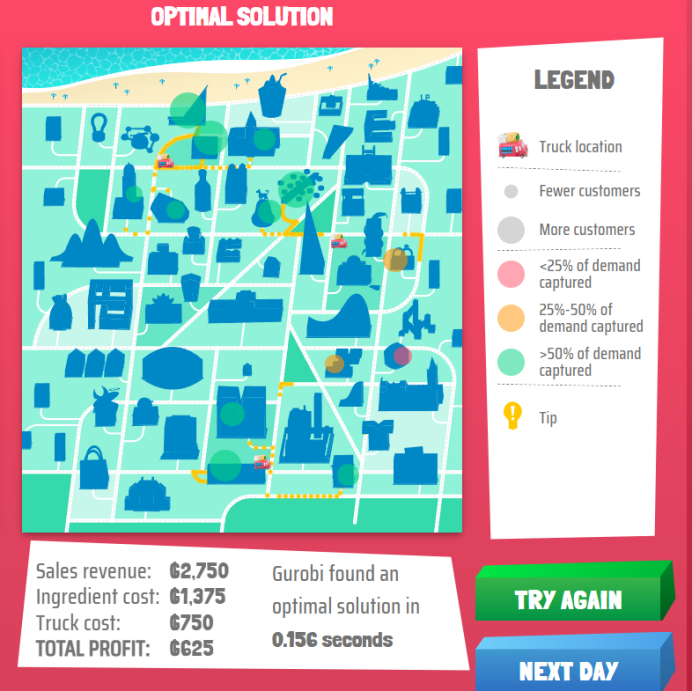

## Question (c)

In [95]:
from gurobipy import *
import pandas as pd

In [96]:
m = Model()

## Step 1: Load the csv files into DataFrame

In [97]:
customer = pd.read_csv("round1-day1_demand_node_data.csv")
supply_demand = pd.read_csv("round1-day1_demand_truck_data.csv")
parameter = pd.read_csv("round1-day1_problem_data.csv")
truck = pd.read_csv("round1-day1_truck_node_data.csv")
print(customer)

       index                                   name           x           y  \
0    demand2                            ReLU Realty  190.720688   72.661102   
1   demand11  Reinforcement Learning Puppy Training  284.838551  188.794658   
2   demand13  Linear Regression Psychology Services  315.279312  163.642738   
3   demand15                              MILP Mart  176.742787  186.931553   
4   demand16                         Rothberg Tower  129.217925  168.611018   
5   demand24        Presolve: Prenuptial Agreements  429.276857  244.687813   
6   demand34                     Scheduling Station  359.387354  363.926544   
7   demand35           Elastic Net Fishing Supplies  437.663597  354.611018   
8   demand40                  Land & Harcourt's B&B  375.228975  491.238731   
9   demand41              K-Fold Parking Validation  233.896869  480.681135   
10  demand49                           Big-M Market  241.972990  421.682805   
11  demand52                  Cutting Stock Atelier 

## Step 2: Calculate the demand matrix

In [98]:
scaled_demand = [[0]*len(J) for i in I]
lst=supply_demand['scaled_demand'].tolist()
for i in I:
    for j in J:
        scaled_demand[i-1][j-1]=lst[16*(i-1)+j-1]
print(scaled_demand)

[[21, 35, 47, 22, 50, 16, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0], [1, 0, 6, 12, 11, 10, 22, 4, 1, 0, 0, 0, 0, 0, 19, 16], [7, 0, 0, 28, 4, 2, 39, 3, 0, 0, 0, 0, 0, 0, 32, 26], [0, 13, 15, 3, 9, 11, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0], [0, 7, 7, 0, 2, 10, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 12, 0, 0, 13, 0, 0, 0, 0, 0, 10], [0, 0, 0, 0, 0, 0, 1, 0, 5, 15, 0, 6, 4, 10, 3, 10], [0, 0, 0, 0, 0, 0, 1, 0, 1, 15, 0, 2, 0, 10, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 7, 15, 18, 20, 0, 1], [0, 0, 0, 0, 0, 0, 0, 3, 17, 0, 40, 29, 24, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 14, 23, 20, 11, 0, 8], [13, 34, 44, 29, 44, 17, 4, 0, 0, 0, 0, 0, 0, 0, 16, 0], [10, 9, 14, 18, 18, 2, 7, 0, 0, 0, 0, 0, 0, 0, 6, 0]]


In [99]:
demand =customer['demand'].tolist()

## Step 3:  Add decision variables

In [111]:
I = list(range(1,len(customer)+1)) # demand list
J = list(range(1,len(truck)+1)) # supply list
K = list(range(1,len(truck)+1)) # truck list
x = m.addVars(J, vtype=GRB.INTEGER,name="x") # number of trucks put in location j
d = m.addVars(I, J, vtype=GRB.INTEGER,name="d") # number rof demand from customer i to location j

16


## Step 4:  Add objective function

In [101]:
m.setObjective((sum(5*d[i,j] for i in I for j in J)-
                sum(250*x[j] for j in J)),
                   GRB.MAXIMIZE)

### Constraint 1: truck number constraint

In [110]:
m.addConstr(sum(x[j] for j in J)<= len(truck))

<gurobi.Constr *Awaiting Model Update*>

### Constraint 2: truck capacity constraints

In [103]:
for j in J:
    m.addConstr(sum(d[i, j] for i in I) <= 30*x[j])

### Constraint 3: Total demand constraint

In [104]:
for i in I:
    m.addConstr(sum(d[i, j] for j in J) <= demand[i-1])

### Constraint 4: scaled demand constraints

In [107]:
m.addConstrs(d[i, j] <= scaled_demand[i-1][j-1] for i in I for j in J)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (1, 16): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Upd

In [108]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 238 rows, 224 columns and 656 nonzeros
Model fingerprint: 0xf0cde62b
Variable types: 0 continuous, 224 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [5e+00, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+01]

Loaded MIP start from previous solve with objective -0

Presolve removed 208 rows and 118 columns
Presolve time: 0.00s
Presolved: 30 rows, 106 columns, 212 nonzeros
Variable types: 0 continuous, 106 integer (8 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 1: -0 
No other solutions better than -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound 

In [109]:
m.printAttr('X')


    Variable            X 
-------------------------
